<a href="https://colab.research.google.com/github/Pepearreolaai/DBSCAN_K_Means_Clustering.ipynb/blob/main/DBSCAN_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K Means Clustering Applications

In this notebook, I give you several basic applications of K Means Clustering algorithm (clustering in general)

In [76]:
%pwd

'/content'

In [75]:
git remote add origin https://github.com/Pepearreolaai/DBSCAN_K_Means_Clustering.ipynb.git
git branch -M main
git push -u origin main

SyntaxError: ignored

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from skimage import io
import time

from sklearn.cluster import KMeans as KMeans


In [2]:
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib as mpl

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import yaml
import numpy as np
import sklearn

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV , TimeSeriesSplit
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.metrics import roc_auc_score , roc_curve
from sklearn.metrics import precision_score, recall_score,precision_recall_curve,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans as KMeans_


In [14]:
from google.colab import files
uploaded = files.upload()

Saving CONCENTRADO_KMEANS_1.1csv.csv to CONCENTRADO_KMEANS_1.1csv (1).csv


In [15]:
import io
df = pd.read_csv(io.BytesIO(uploaded['CONCENTRADO_KMEANS_1.1csv.csv']))

In [23]:
from google.colab import files
uploaded = files.upload()

Saving CONCENTRADO_KMEANS_1.3csv.csv to CONCENTRADO_KMEANS_1.3csv (2).csv


In [24]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['CONCENTRADO_KMEANS_1.3csv.csv']))

In [25]:
from google.colab import files
uploaded = files.upload()

Saving CONCENTRADO_KMEANS_1.3csv.csv to CONCENTRADO_KMEANS_1.3csv (3).csv


In [26]:
import io
df3 = pd.read_csv(io.BytesIO(uploaded['CONCENTRADO_KMEANS_1.3csv.csv']))

In [27]:
from google.colab import files
uploaded = files.upload()

Saving CONCENTRADO_KMEANS_1.4csv.csv to CONCENTRADO_KMEANS_1.4csv (2).csv


In [28]:
import io
df4 = pd.read_csv(io.BytesIO(uploaded['CONCENTRADO_KMEANS_1.4csv.csv']))

## Simple Customer Segmentation

In [29]:
df.head()

,poblacion,ancho,largo,m2_predio,locales,niveles
0,1484005,47,50,2350,35,2
1,1484005,79,56,4424,12,1
2,1484005,93,95,8835,9,1
3,1484005,101,85,8585,12,1
4,1484005,60,30,1800,14,1


In [30]:
df.describe()

,ancho,largo,m2_predio,locales,niveles
count,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000
mean,69.634875,64.681118,6670.045279,18.872832,1.788054
std,57.189130,64.266302,19598.020372,23.407447,0.760254
min,10.000000,6.000000,82.000000,1.000000,1.000000
25%,35.000000,30.000000,1164.000000,9.000000,1.000000
50%,54.000000,48.000000,2550.000000,14.000000,2.000000
75%,85.750000,78.000000,5937.500000,22.000000,2.000000
max,608.000000,670.000000,364000.000000,302.000000,8.000000


In [31]:
df2.head()

,ancho,largo
0,47,50
1,79,56
2,93,95
3,101,85
4,60,30


In [32]:
df2.tail()

,ancho,largo
984,55,31
985,42,40
986,77,31
987,58,24
988,48,103


In [33]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ancho   989 non-null    int64
 1   largo   989 non-null    int64
dtypes: int64(2)
memory usage: 15.6 KB


In [34]:
df3.head()

,ancho,largo
0,47,50
1,79,56
2,93,95
3,101,85
4,60,30


In [35]:
df4.head()

,ancho,largo
0,47,50
1,79,56
2,93,95
3,101,85
4,60,30


**VARIANZA**

In [36]:
df.std()/df.mean()

ancho        0.821271
largo        0.993587
m2_predio    2.938214
locales      1.240272
niveles      0.425185
dtype: float64

In [37]:
df2.std()/df2.mean()

ancho    0.606444
largo    0.630353
dtype: float64

In [38]:
df[['poblacion', 'ancho', 'largo', 'm2_predio', 'locales', 'niveles']].corr()

,ancho,largo,m2_predio,locales,niveles
ancho,1.000000,0.589893,0.750516,0.514121,-0.074508
largo,0.589893,1.000000,0.797378,0.488129,-0.063339
m2_predio,0.750516,0.797378,1.000000,0.530209,-0.029606
locales,0.514121,0.488129,0.530209,1.000000,0.194972
niveles,-0.074508,-0.063339,-0.029606,0.194972,1.000000


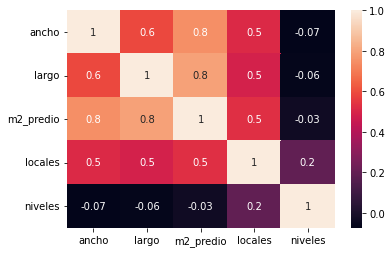

In [39]:
sns.heatmap(df[['poblacion', 'ancho', 'largo', 'm2_predio', 'locales', 'niveles']].corr(), annot = True, fmt='.1g')

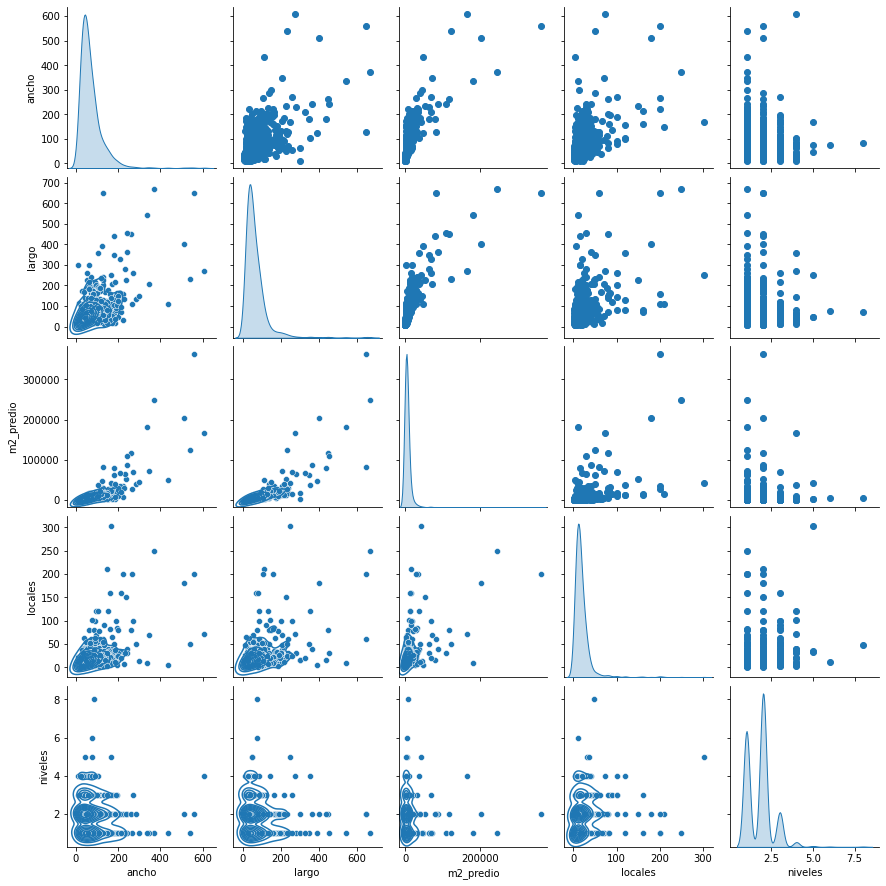

In [40]:
p2 = sns.pairplot(df, diag_kind="kde") 
p2.map_upper(plt.scatter)
p2.map_lower(sns.kdeplot)


In [41]:
df2[[ 'ancho', 'largo']].corr()

,ancho,largo
ancho,1.000000,0.425006
largo,0.425006,1.000000


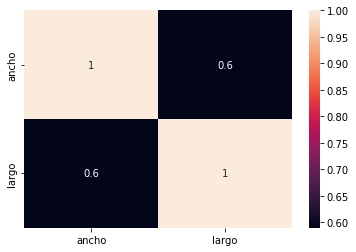

In [42]:
sns.heatmap(df[['ancho', 'largo']].corr(), annot = True, fmt='.1g')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


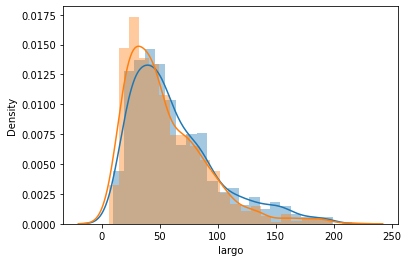

In [43]:
sns.distplot(df2['ancho'])
sns.distplot(df2['largo']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


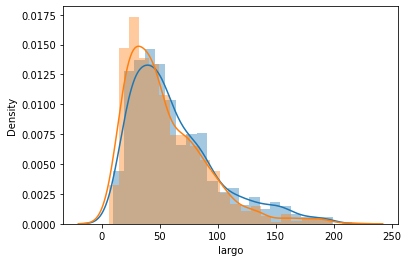

In [44]:
sns.distplot(df3['ancho'])
sns.distplot(df3['largo']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


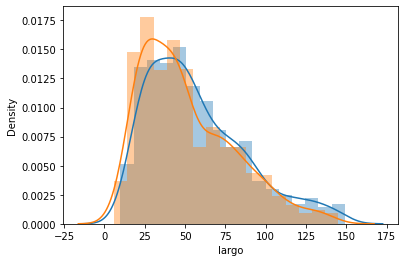

In [45]:
sns.distplot(df4['ancho'])
sns.distplot(df4['largo']);

In [46]:
X = df[['ancho', 'largo','niveles']]

In [47]:
X_norm= (X-X.min())/(X.max()-X.min())
X_norm

,ancho,largo,niveles
0,0.061873,0.066265,0.142857
1,0.115385,0.075301,0.000000
2,0.138796,0.134036,0.000000
3,0.152174,0.118976,0.000000
4,0.083612,0.036145,0.000000
...,...,...,...
1033,0.053512,0.051205,0.000000
1034,0.112040,0.037651,0.000000
1035,0.080268,0.027108,0.000000
1036,0.063545,0.146084,0.142857


In [48]:
X.describe()

,ancho,largo,niveles
count,1038.000000,1038.000000,1038.000000
mean,69.634875,64.681118,1.788054
std,57.189130,64.266302,0.760254
min,10.000000,6.000000,1.000000
25%,35.000000,30.000000,1.000000
50%,54.000000,48.000000,2.000000
75%,85.750000,78.000000,2.000000
max,608.000000,670.000000,8.000000


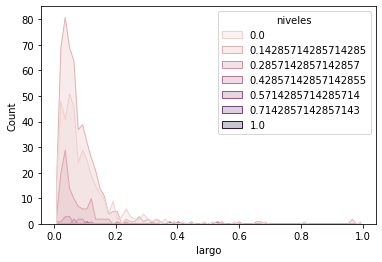

In [49]:
sns.histplot(X_norm, x='largo',hue='niveles', element="poly")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

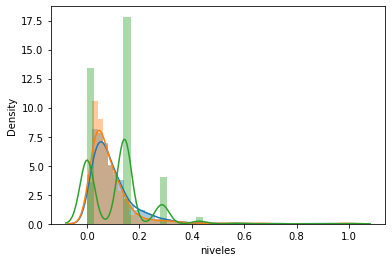

In [50]:
sns.distplot(X_norm['ancho'])
sns.distplot(X_norm['largo'])
sns.distplot(X_norm['niveles']);

Text(0, 0.5, 'largo')

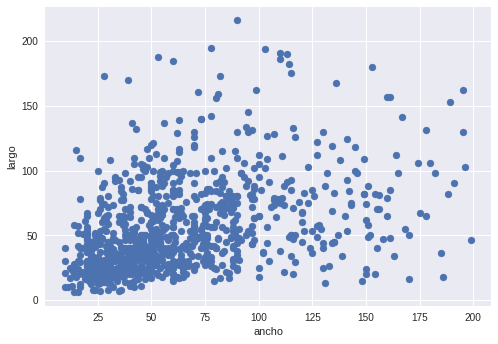

In [51]:
plt.close()
plt.style.use('seaborn')
plt.scatter(df2['ancho'], df2['largo'])
plt.xlabel('ancho')
plt.ylabel('largo')

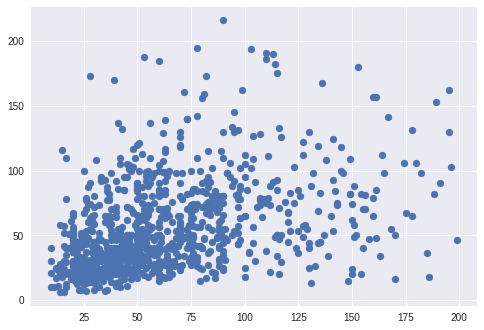

In [52]:
plt.scatter(df3['ancho'],df3['largo'])

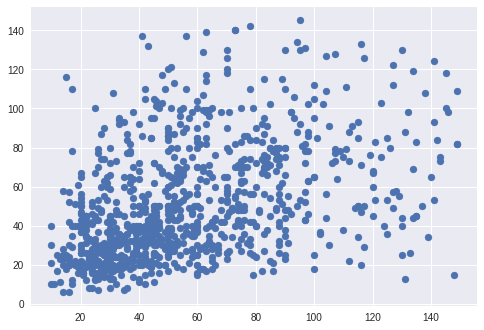

In [53]:
plt.scatter(df4['ancho'],df4['largo'])

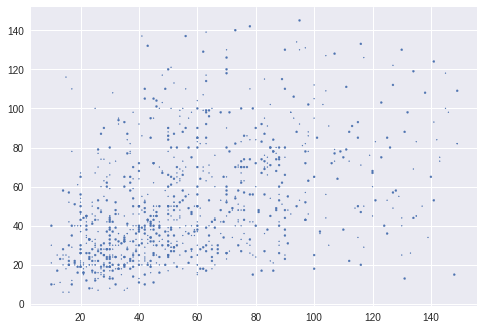

In [54]:
plt.scatter(df4['ancho'],df4['largo'],sizes =(1,4))

In [55]:
kmeans = KMeans(n_clusters=60)
m_60 = kmeans.fit(df3)

In [ ]:
arr = X.astype('float32')

In [56]:
results = pd.DataFrame({'ancho' : df3.iloc[:, 0], 'largo': df3.iloc[:,1]})
results['group'] = m_60.labels_
results['group'] = results.group.astype(str)


In [57]:
centroids = pd.DataFrame({'ancho' : m_60.cluster_centers_[:,0], 'largo' : m_60.cluster_centers_[:,1]})
centroids['group'] = "C"

In [58]:
concatenado = pd.concat([results, centroids])

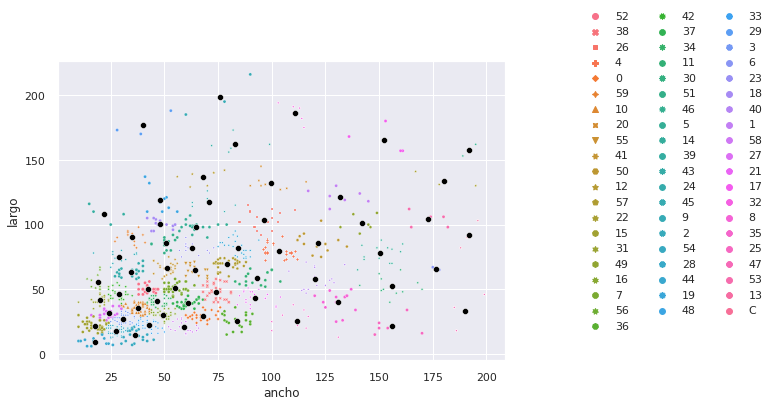

<Figure size 3000x1500 with 0 Axes>

In [59]:
sns.set_theme()
sns.scatterplot(x='ancho', y='largo', data=concatenado, hue="group", s=10, style="group")
sns.scatterplot(x='ancho', y='largo', data=centroids,color="00")
plt.legend(ncol=3, loc='upper right', bbox_to_anchor=(1.6, 1.2))
plt.figure(figsize=(30, 15), dpi=100)
plt.savefig('pic.eps', format='eps', dpi=1000)

In [60]:
wcss = []

for i in range(1, 60):
    kmeans = KMeans(n_clusters = i , max_iter=300)
    kmeans.fit(df2)
    wcss.append(kmeans.inertia_)
   
 


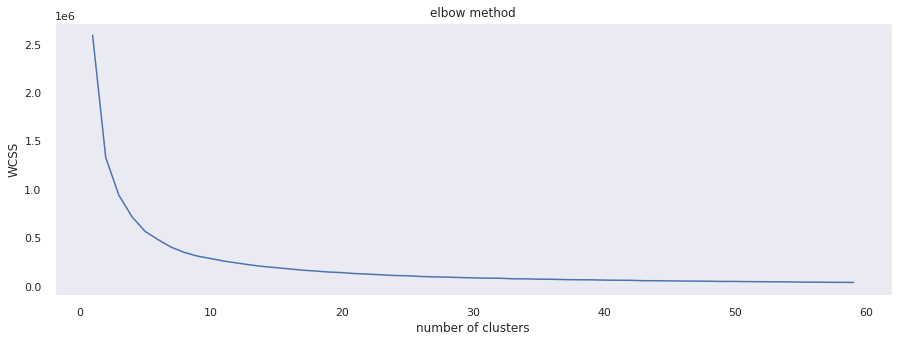

In [61]:
plt.plot(range(1,60) , wcss)

plt.title('elbow method')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.gcf().set_size_inches(15,5)
plt.show()

In [62]:
kmeans1 = KMeans(n_clusters=60)
m_60_1 = kmeans1.fit(df4)

In [ ]:
arr = X.astype('float32')

In [63]:
results140 = pd.DataFrame({'ancho' : df4.iloc[:, 0], 'largo': df4.iloc[:,1]})
results140['group1'] = m_60_1.labels_
results140['group1'] = results140.group1.astype(str)


In [64]:
centroids140 = pd.DataFrame({'ancho' : m_60_1.cluster_centers_[:,0], 'largo' : m_60_1.cluster_centers_[:,1]})
centroids140['group1'] = "C"

In [65]:
df5 = pd.concat([results140, centroids140])

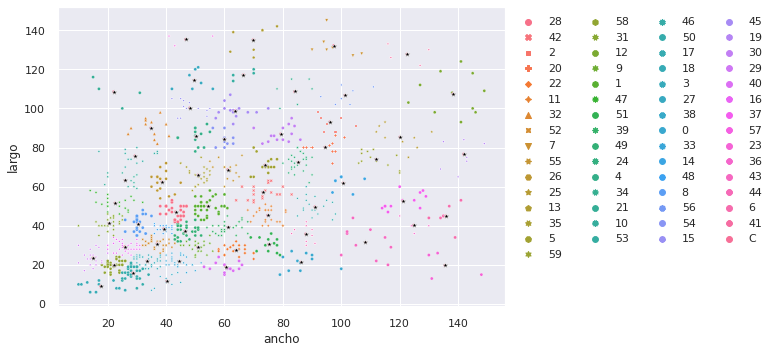

<Figure size 20000x10000 with 0 Axes>

In [66]:
sns.set_theme()
sns.scatterplot(x='ancho', y='largo', data=df5, hue="group1", s=10, style="group1")
sns.scatterplot(x='ancho', y='largo', data=centroids140,color="00", marker='*')
plt.legend(ncol=4, loc='upper right', bbox_to_anchor=(1.6, 1))
plt.figure(figsize=(20, 10), dpi=1000)
plt.savefig('pic1.png', format='png', dpi=1000)

In [67]:
df4['clusters']=kmeans1.labels_

In [68]:
df4.head()

,ancho,largo,clusters
0,47,50,28
1,79,56,42
2,93,95,2
3,101,85,20
4,60,30,22


In [69]:
df4['clusters'].value_counts()

16    36
1     36
3     32
58    31
49    30
28    29
50    28
33    27
52    26
9     26
31    25
24    25
39    25
11    24
8     23
35    22
29    21
47    20
42    19
17    19
22    19
48    19
26    16
5     16
40    15
45    15
4     14
55    14
30    14
15    12
59    12
32    12
51    12
46    12
37    12
20    11
10    11
12    11
18    11
0     11
43    10
54    10
25     9
44     9
38     9
2      8
19     8
13     7
7      7
6      7
27     7
56     7
14     7
34     6
23     4
36     4
21     4
53     4
41     4
57     3
Name: clusters, dtype: int64

In [ ]:
sns.set_theme()
sns.scatterplot(x='ancho', y='largo', data=df5, hue="group", s=10, style="group")
sns.scatterplot(x='ancho', y='largo', data=centroids140)
sns.scatterplot(x='ancho', y='largo', data=centroids)
plt.legend(ncol=4, loc='upper right', bbox_to_anchor=(1.8, 1.1))
plt.figure(figsize=(20, 10), dpi=500)
plt.savefig('pic1.png', format='png', dpi=1000)

In [72]:
m_60_1.cluster_centers_

array([[ 86.27272727,  21.36363636],
       [ 54.36111111,  50.02777778],
       [ 96.125     ,  93.125     ],
       [ 33.53125   ,  22.        ],
       [ 50.21428571,  85.64285714],
       [ 73.9375    ,  71.0625    ],
       [135.85714286,  45.        ],
       [ 97.42857143, 132.14285714],
       [ 30.52173913,  41.        ],
       [ 50.84615385,  29.        ],
       [ 26.        ,  63.18181818],
       [ 74.75      ,  45.33333333],
       [138.27272727, 107.45454545],
       [ 69.85714286, 135.14285714],
       [100.71428571,  61.85714286],
       [ 48.08333333, 100.25      ],
       [ 25.86111111,  29.27777778],
       [ 91.        ,  49.68421053],
       [ 17.54545455,   9.09090909],
       [141.875     ,  76.625     ],
       [ 94.45454545,  80.18181818],
       [ 22.        , 108.5       ],
       [ 63.94736842,  27.47368421],
       [135.5       ,  19.75      ],
       [ 85.32      ,  72.52      ],
       [120.11111111,  85.33333333],
       [ 38.6875    ,  62.4375    ],
 

In [73]:
wcssdf4 = []

for i in range(1, 60):
    kmeans2 = KMeans(n_clusters = i , max_iter=300)
    kmeans2.fit(df4)
    wcssdf4.append(kmeans2.inertia_)
   
 


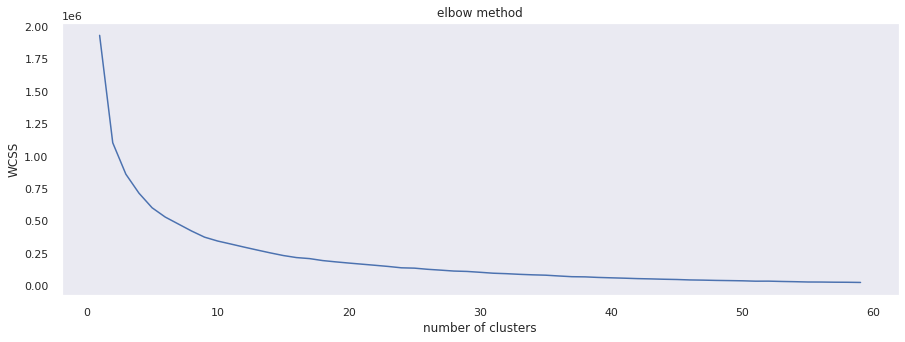

In [74]:
plt.plot(range(1,60) , wcssdf4)

plt.title('elbow method')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.gcf().set_size_inches(15,5)
plt.show()

# DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
model=DBSCAN(min_samples=7)


In [ ]:
x= df4.iloc[:,0]
y= df4.iloc[:,1]

In [ ]:
clusters1=model.fit_predict(df4)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


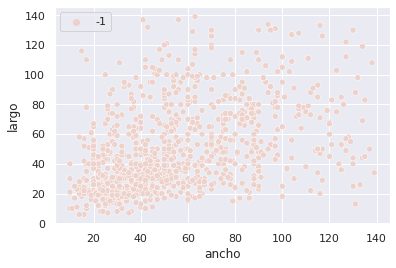

In [ ]:
sns.scatterplot(x,y,hue=clusters1)

In [ ]:
df3['DBSCAN_labels']=dbscan.labels_

plt.figure(figsize=(10,10)
plt.scatter(df3.iloc[0],df3.iloc[1], c=df3['DBSCAN_labels'])
plt.title('DBSCAN Clustering',fontsize=20)
plt.show()

SyntaxError: ignored

In [ ]:
n_clusters = range(1,60)
kmeans = [KMeans(n_clusters=i).fit(df3) for i in n_clusters]
scores = [KMeans[i].scores(df3) for i in range(len(kmeans))]

f =plt.figure(1, figsize=(16,6))
plt.plot(scores)
_ = plt.xticks(n_clusters)

In [ ]:
m_60.cluster_centers_

array([[ 30.85714286,  43.71428571],
       [111.        , 128.5       ],
       [ 93.21052632,  50.10526316],
       [ 37.125     ,  90.        ],
       [148.09090909,  87.09090909],
       [ 47.08      ,  21.36      ],
       [150.5       ,  18.        ],
       [ 90.375     ,  79.66666667],
       [ 16.8125    ,  22.28125   ],
       [ 69.85714286, 135.14285714],
       [ 42.84615385,  49.07692308],
       [110.83333333, 186.33333333],
       [121.07692308,  52.        ],
       [ 38.82758621,  24.96551724],
       [ 84.86666667,  24.06666667],
       [184.8       , 143.4       ],
       [ 72.78571429,  52.71428571],
       [ 78.        ,  89.4375    ],
       [ 39.15789474,  67.36842105],
       [121.3       ,  89.4       ],
       [ 61.42307692,  39.19230769],
       [ 55.04545455,  83.59090909],
       [190.        ,  33.33333333],
       [ 80.        , 114.66666667],
       [ 56.5       , 186.5       ],
       [ 49.86666667, 110.        ],
       [180.        ,  99.375     ],
 

In [ ]:
plt.close()

for i, cluster_mean in enumerate(m_60):
    data_cluster_i = m_60[ m_60[:, -1] == i ]
    plt.scatter(data_cluster_i[:, 0], data_cluster_i[:, 1], label = 'model ' + str(i))
    plt.plot(cluster_mean[0], cluster_mean[1], label = 'Centroid ' + str(i), marker='*', markersize=15, markeredgecolor="k", markeredgewidth=1)
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.style.use('seaborn')
    plt.legend()

TypeError: ignored

## Searching for optimum K by Elbow Method

In [ ]:
def elbow_method(X, max_k = 10):
    costs = []
    for k in range(2, max_k):
        model = KMeans(n_clusters=k)
        model.fit(X1)
        costs.append(model.cost_)
    plt.close()
    plt.plot(list(range(2, max_k)), costs)
    plt.xlabel("# of clusters (K)")
    plt.ylabel("Cost")

In [ ]:
elbow_method(X)

ValueError: ignored

## Image Compression by K Means Clustering

### With OpenCV

In [ ]:

cat_img_orig = cv2.imread('example_datasets/sleeping_cats.jpg')

cat_img_orig = cv2.cvtColor(cat_img_orig, cv2.COLOR_BGR2RGB)
cat_img_shape = cat_img_orig.shape
# Convert 3d image array to 2d array
cat_img_orig = cat_img_orig / 255
cat_img = cat_img_orig.reshape(-1, 3)

cat_img_shape

(423, 640, 3)

In [ ]:
model = KMeans(n_clusters=16, init_method = 'var_part') # When var_part is used, the algorithm is a lot faster.
cluster_means, image_data_with_clusters = model.fit(cat_img)

In [ ]:
model.cost_

14484.706305129

In [ ]:
compressed_image = np.zeros(cat_img.shape)

## Assigning each pixel color to its corresponding cluster centroid
for i, cluster in enumerate(image_data_with_clusters[:, -1]):
    compressed_image[i, :] = cluster_means[ int(cluster) ]

In [ ]:
compressed_image.shape

(270720, 3)

In [ ]:
compressed_image_reshaped = compressed_image.reshape(cat_img_shape)

In [ ]:
compressed_image_reshaped.shape

(423, 640, 3)

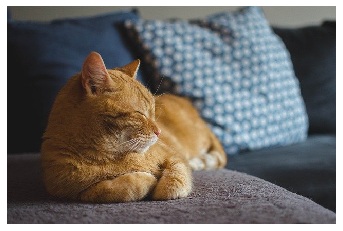

In [ ]:
%matplotlib inline
plt.close()
plt.axis('off')
plt.imshow(cat_img_orig)

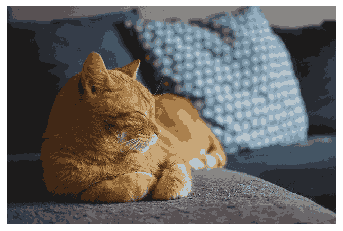

In [ ]:
plt.close()
plt.axis('off')
plt.imshow(compressed_image_reshaped)

### With scikit-image

I used scikit-image because openCV was ridiculously increasing the file size, even though I only read the image into matrix and write to a file again.

In [ ]:
def compress_by_k_means(image_name, compressed_image_name, n_clusters = 8):
    start = time.time()
    
    image = io.imread(image_name)
    orig_shape = image.shape
    image = image.reshape(-1, image.shape[2]) / 255 # Normalization. It improves the performance so much!
    img_shape = image.shape
    
    
    
    model = KMeans(n_clusters=n_clusters, init_method = 'var_part', tolerance = 0.01)

    cluster_means, image_data_with_clusters = model.fit(image)
    
    compressed_image = np.zeros(img_shape)

    for i, cluster in enumerate(image_data_with_clusters[:, -1]):
        compressed_image[i, :] = cluster_means[ int(cluster) ]
        
    compressed_image = compressed_image * 255
    compressed_image_reshaped = compressed_image.reshape(orig_shape).astype('uint8') # Can't write float type matrix to an image file
    io.imsave(compressed_image_name, compressed_image_reshaped)
    
    end = time.time()
    
    print('Compressed in', end-start, 'seconds') # Calculating the time elapsed while compressing the image. Depends on n_clusters and file size and also on the computer

In [ ]:
compress_by_k_means('example_datasets/car.png', 'example_datasets/car_comp.png', n_clusters=8)

### Original Image: 221 kb. Compressed Image: 18 kb

Compressed in 0.48164916038513184 seconds


In [ ]:
compress_by_k_means('example_datasets/karakoy.jpg', 'example_datasets/karakoy_comp.jpg', n_clusters=8)

### Original Image: 167 kb. Compressed Image: 125 kb

Compressed in 2.8309500217437744 seconds


In [ ]:
compress_by_k_means('example_datasets/dog.jpg', 'example_datasets/dog_comp.jpg', n_clusters=16)

## Original Image: 533 kb. Compressed Image: 412 kb

Compressed in 24.668309688568115 seconds


In [ ]:
compress_by_k_means('example_datasets/wolf.jpg', 'example_datasets/wolf_comp.jpg', n_clusters=16)

## Original Image: 228 kb. Compressed Image: 183 kb

Compressed in 9.435445785522461 seconds


In [ ]:
compress_by_k_means('example_datasets/rabbit.jpg', 'example_datasets/rabbit_comp.jpg', n_clusters=8)

### Original Image: 884 kb. Compressed Image: 689 kb

Compressed in 13.793962717056274 seconds


## EEG Recordings Dataset

In [ ]:
df = pd.read_csv('example_datasets/epileptic_seizure.csv')
df

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,...,15,16,12,5,-1,-18,-37,-47,-48,2
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,...,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,...,121,135,148,143,116,86,68,59,55,3


In [ ]:
X = df.iloc[:, 1:-1]
X

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,135,190,229,223,192,125,55,-9,-33,-38,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
1,386,382,356,331,320,315,307,272,244,232,...,168,164,150,146,152,157,156,154,143,129
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,29,57,64,48,19,-12,-30,-35,-35,-36
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,10,4,2,-12,-32,-41,-65,-83,-89,-73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,20,15,16,12,5,-1,-18,-37,-47,-48
11496,-47,-11,28,77,141,211,246,240,193,136,...,-94,-65,-33,-7,14,27,48,77,117,170
11497,14,6,-13,-16,10,26,27,-9,4,14,...,-42,-65,-48,-61,-62,-67,-30,-2,-1,-8
11498,-40,-25,-9,-12,-2,12,7,19,22,29,...,114,121,135,148,143,116,86,68,59,55


In [ ]:
n_clusters = df['y'].unique().size

In [ ]:
model = KMeans(n_clusters=n_clusters, init_method='var_part')

In [ ]:
a = time.time()
clusters, labeled_X = model.fit(X)
b = time.time()

b-a

1.3206572532653809

In [ ]:
model.cost_

15794238.290983565

In [ ]:
a = time.time()
model = KMeans(n_clusters=16, init_method='forgy')
model.fit(X)

b = time.time()

b-a

10.798281192779541

In [ ]:
model.cost_

15017239.790582392

## Letter Recognition Dataset

In [ ]:
df = pd.read_csv('example_datasets/letter-recognition.data', header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [ ]:
X = df.iloc[:, 1:]
X

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [ ]:
n_clusters = df.iloc[:, 0].unique().size
n_clusters

26

In [ ]:
model = KMeans(n_clusters=n_clusters, init_method='var_part', tolerance = 0.001)
a = time.time()
clusters, labeled_X = model.fit(X)
b = time.time()

b-a

1.8468894958496094

In [ ]:
model.cost_

107698.44917338352

In [ ]:
a = time.time()
model = KMeans(n_clusters=n_clusters, init_method='forgy', tolerance = 0.001)
model.fit(X)

b = time.time()

b-a

1.6438746452331543

In [ ]:
model.cost_

107502.15354435568